In [10]:
import numpy as np
import matplotlib.pyplot as plt


/var/folders/wr/yb1fjkjn1mbg644j5v7f2tlm0000gp/T/ipykernel_62418/1068824403.py:20: RuntimeWarning: invalid value encountered in power
  return np.where(m < 2 * m_l , 0.0, (m * m_l2) / (8 * np.pi * vev**2) * (1 - 4 * m_l2 / m2)**1.5) # GeV
/var/folders/wr/yb1fjkjn1mbg644j5v7f2tlm0000gp/T/ipykernel_62418/1068824403.py:37: RuntimeWarning: invalid value encountered in sqrt
  return np.where(m < 2 * m_pi, 0.0, sf * (3 * np.abs(G_pi(m**2, m_pi))**2) / (32 * np.pi * vev**2 * m) * np.sqrt(1 - 4 * m_pi**2 / m**2)) # GeV


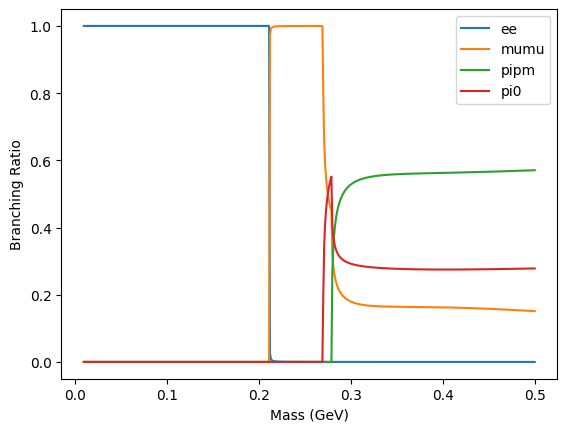

In [11]:
target_dist  = np.float64(678.8385658608386) # m
absorber_dist = np.float64(101.50639635018082) # m

m_e = 0.511e-3 # GeV
m_mu = 0.1056583745 # GeV
m_pi0 = 0.1349769 # GeV
m_pipm = 0.13957039 # GeV
vev = 246.0 # GeV

hbar = 6.58211899e-25 # GeV s
c = 2.99792458e8 # m/s

def scalar_ll_decay_width(m, m_l):
    """
    Calculate the decay width of a scalar particle decaying into two leptons.
    """

    m2 = m**2
    m_l2 = m_l**2
    return np.where(m < 2 * m_l , 0.0, (m * m_l2) / (8 * np.pi * vev**2) * (1 - 4 * m_l2 / m2)**1.5) # GeV

def G_pi(s, m_pi):
    return 2/9 * s + 11/9 * m_pi**2 # GeV^2

def scalar_pipi_decay_width(m, m_pi):
    """
    Calculate the decay width of a scalar particle decaying into two pions.
    """

    # Charge conjugation symmetry of pi+ pi- channel means width is double the pi0 channel
    sf = 1
    if m_pi == m_pi0:
        sf = 1
    elif m_pi == m_pipm:
        sf = 2

    return np.where(m < 2 * m_pi, 0.0, sf * (3 * np.abs(G_pi(m**2, m_pi))**2) / (32 * np.pi * vev**2 * m) * np.sqrt(1 - 4 * m_pi**2 / m**2)) # GeV

    # if m < 2 * m_pi:
    #     return 0.0

    
def lifetime(m, theta):
    total_width = theta**2 * scalar_ll_decay_width(m, m_e) + theta**2 * scalar_ll_decay_width(m, m_mu) + theta**2 * scalar_pipi_decay_width(m, m_pi0) + theta**2 * scalar_pipi_decay_width(m, m_pipm)
    return hbar / total_width # s


def branching_ratio(m, theta, channel='ee'):
    # Get the production threshold of the channel
    if channel == 'ee':
        width = theta**2 * scalar_ll_decay_width(m, m_e)
    elif channel == 'mumu':
        width = theta**2 * scalar_ll_decay_width(m, m_mu)
    elif (channel == 'pipm' or channel == 'pi-' or channel == 'pi+'):
        width = theta**2 * scalar_pipi_decay_width(m, m_pipm)
    elif channel == 'pi0':
        width = theta**2 *  scalar_pipi_decay_width(m, m_pi0)
    else:
        raise ValueError("Invalid channel\n Must be one of 'ee', 'mumu', 'pipm' (or 'pi+' or 'pi-'), 'pi0'")
    # Check if the mass is above the production threshold
    total_width = theta**2 * scalar_ll_decay_width(m, m_e) + theta**2 * scalar_ll_decay_width(m, m_mu) + theta**2 * scalar_pipi_decay_width(m, m_pi0) + theta**2 * scalar_pipi_decay_width(m, m_pipm)
    return width / total_width 


mass_range = np.linspace(0.01, 0.5, 500)

plt.plot(mass_range, branching_ratio(mass_range, 0.1, channel='ee'), label='ee')
plt.plot(mass_range, branching_ratio(mass_range, 0.1, channel='mumu'), label='mumu')
plt.plot(mass_range, branching_ratio(mass_range, 0.1, channel='pipm'), label='pipm')
plt.plot(mass_range, branching_ratio(mass_range, 0.1, channel='pi0'), label='pi0')
plt.legend()
plt.xlabel('Mass (GeV)')
plt.ylabel('Branching Ratio')
plt.show()

/var/folders/wr/yb1fjkjn1mbg644j5v7f2tlm0000gp/T/ipykernel_62418/1068824403.py:20: RuntimeWarning: invalid value encountered in power
  return np.where(m < 2 * m_l , 0.0, (m * m_l2) / (8 * np.pi * vev**2) * (1 - 4 * m_l2 / m2)**1.5) # GeV
/var/folders/wr/yb1fjkjn1mbg644j5v7f2tlm0000gp/T/ipykernel_62418/1068824403.py:37: RuntimeWarning: invalid value encountered in sqrt
  return np.where(m < 2 * m_pi, 0.0, sf * (3 * np.abs(G_pi(m**2, m_pi))**2) / (32 * np.pi * vev**2 * m) * np.sqrt(1 - 4 * m_pi**2 / m**2)) # GeV


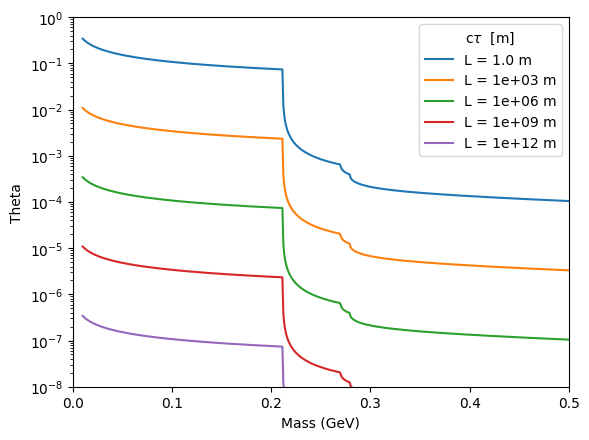

In [24]:
def decay_length(m, theta, energy):
    """
    Calculate the decay length of a scalar particle to create isocontours.
    """
    # Calculate the lifetime
    tau = lifetime(m, theta) # s
    tau = lifetime(m, theta)
    gamma = energy / m 
    beta = np.sqrt(1 - 1 / gamma**2) 
    # Calculate the decay length
    
    return beta * gamma * tau * c # m


def isocontour(L, m, energy):
    """
    Get the value of theta for a given decay length L and mass m. 
    """
    # Use the scalar width without the theta factor
    total_width = scalar_ll_decay_width(m, m_e) + scalar_ll_decay_width(m, m_mu) + scalar_pipi_decay_width(m, m_pi0) + scalar_pipi_decay_width(m, m_pipm)
    gamma = energy / m
    beta = np.sqrt(1 - 1 / gamma**2)

    return np.sqrt( (c * gamma * beta * hbar) / (L * total_width) )

def proper_decay_length(m, theta):
    """
    Calculate the proper decay length of a scalar particle to create isocontours.
    """
    # Calculate the lifetime
    tau = lifetime(m, theta) # s
    # Calculate the decay length
    return tau * c # m

def proper_isocontour(L, m):
    """
    Get the value of theta for a given decay length L and mass m. 
    """
    # Use the scalar width without the theta factor
    total_width = scalar_ll_decay_width(m, m_e) + scalar_ll_decay_width(m, m_mu) + scalar_pipi_decay_width(m, m_pi0) + scalar_pipi_decay_width(m, m_pipm)
    return np.sqrt( (c * hbar) / (L * total_width) )
L = [1, 1e3, 1e6, 1e9, 1e12]
energy = 1 # GeV

for length in L:
    # Calculate the isocontour for each mass
    # theta = isocontour(length, mass_range, energy)
    theta = proper_isocontour(length, mass_range)
    plt.plot(mass_range, theta, label=f'L = {np.float32(length):.2} m')

plt.yscale('log')
plt.xlabel('Mass (GeV)')
plt.ylabel('Theta')
plt.ylim(1e-8,1)
plt.xlim(0,0.5)
plt.legend(title=r'c$\tau$  [m]')
plt.show()

In [18]:
# To get a limit of theta, we assume the decay length is much larger than the target and absorber distances

theta = 1e-3 # A worst case value of theta, as decay length increases with smaller theta
energies = [0.25, 1, 5] # GeV, testing this approximation with a range of energies

mass_points = [0.100, 0.150, 0.200]
for mass in mass_points:
    print(f"Mass: {mass} GeV")
    print()
    for energy in energies:
        # Calculate the decay length for each mass and energy
        L = np.real(decay_length(mass, theta, energy))
        print(f"Energy: {energy} GeV")
        print(f"Decay Length: {L:.2f} m")
        print(f'L/L_target: {L / target_dist:.2f}')
        print(f'L/L_absorber: {L / absorber_dist:.2f}')
        print()
    print('---')


Mass: 0.1 GeV

Energy: 0.25 GeV
Decay Length: 26339.19 m
L/L_target: 38.80
L/L_absorber: 259.48

Energy: 1 GeV
Decay Length: 114377.43 m
L/L_target: 168.49
L/L_absorber: 1126.80

Energy: 5 GeV
Decay Length: 574653.27 m
L/L_target: 846.52
L/L_absorber: 5661.25

---
Mass: 0.15 GeV

Energy: 0.25 GeV
Decay Length: 10217.21 m
L/L_target: 15.05
L/L_absorber: 100.66

Energy: 1 GeV
Decay Length: 50508.07 m
L/L_target: 74.40
L/L_absorber: 497.59

Energy: 5 GeV
Decay Length: 255315.34 m
L/L_target: 376.11
L/L_absorber: 2515.26

---
Mass: 0.2 GeV

Energy: 0.25 GeV
Decay Length: 4310.26 m
L/L_target: 6.35
L/L_absorber: 42.46

Energy: 1 GeV
Decay Length: 28154.47 m
L/L_target: 41.47
L/L_absorber: 277.37

Energy: 5 GeV
Decay Length: 143560.19 m
L/L_target: 211.48
L/L_absorber: 1414.30

---


/var/folders/wr/yb1fjkjn1mbg644j5v7f2tlm0000gp/T/ipykernel_62418/1068824403.py:37: RuntimeWarning: invalid value encountered in sqrt
  return np.where(m < 2 * m_pi, 0.0, sf * (3 * np.abs(G_pi(m**2, m_pi))**2) / (32 * np.pi * vev**2 * m) * np.sqrt(1 - 4 * m_pi**2 / m**2)) # GeV


In [19]:
np.sqrt(0.1**2 + 0.1**2)

0.14142135623730953

/var/folders/wr/yb1fjkjn1mbg644j5v7f2tlm0000gp/T/ipykernel_62418/1068824403.py:20: RuntimeWarning: invalid value encountered in power
  return np.where(m < 2 * m_l , 0.0, (m * m_l2) / (8 * np.pi * vev**2) * (1 - 4 * m_l2 / m2)**1.5) # GeV
/var/folders/wr/yb1fjkjn1mbg644j5v7f2tlm0000gp/T/ipykernel_62418/1068824403.py:37: RuntimeWarning: invalid value encountered in sqrt
  return np.where(m < 2 * m_pi, 0.0, sf * (3 * np.abs(G_pi(m**2, m_pi))**2) / (32 * np.pi * vev**2 * m) * np.sqrt(1 - 4 * m_pi**2 / m**2)) # GeV


Text(0.5, 1.0, 'Decay Length Contours for $E_{scalar}$ = 1 GeV')

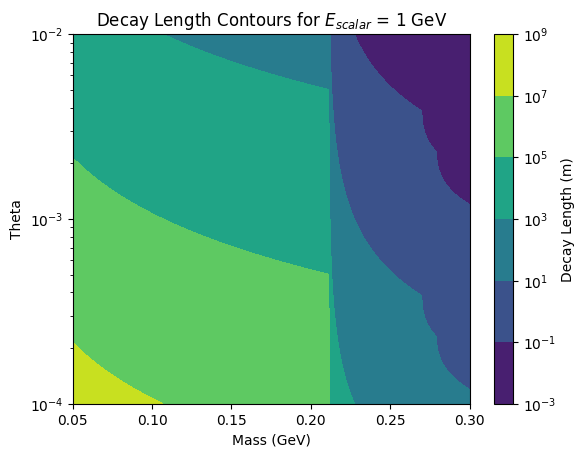

In [32]:
import matplotlib.colors
theta_points = np.logspace(-4,-2, 1000)
mass_points = np.linspace(0.05, 0.3,1000)
energy = 1 # GeV


# Create a meshgrid of mass and theta points
mass_grid, theta_grid = np.meshgrid(mass_points, theta_points)
# Calculate the decay length for each point in the grid
decay_length_grid = decay_length(mass_grid, theta_grid, energy)

# Plot the decay length as a contour plot
plt.figure()
plt.contourf(mass_grid, theta_grid, decay_length_grid, levels=100, cmap='viridis', norm=matplotlib.colors.LogNorm())
plt.colorbar(label='Decay Length (m)')
plt.yscale('log')
plt.xlabel('Mass (GeV)')
plt.ylabel('Theta')
title_string = r'Decay Length Contours for $E_{scalar}$'
title_string += rf' = {energy} GeV'
plt.title(title_string)

# plt.title(rf'Decay Length Contours for $E_{'scalar'}$ = {energy} GeV')


/var/folders/wr/yb1fjkjn1mbg644j5v7f2tlm0000gp/T/ipykernel_62418/1068824403.py:20: RuntimeWarning: invalid value encountered in power
  return np.where(m < 2 * m_l , 0.0, (m * m_l2) / (8 * np.pi * vev**2) * (1 - 4 * m_l2 / m2)**1.5) # GeV
/var/folders/wr/yb1fjkjn1mbg644j5v7f2tlm0000gp/T/ipykernel_62418/1068824403.py:37: RuntimeWarning: invalid value encountered in sqrt
  return np.where(m < 2 * m_pi, 0.0, sf * (3 * np.abs(G_pi(m**2, m_pi))**2) / (32 * np.pi * vev**2 * m) * np.sqrt(1 - 4 * m_pi**2 / m**2)) # GeV


Text(0.5, 1.0, 'Proper decay length (c$\\tau$)')

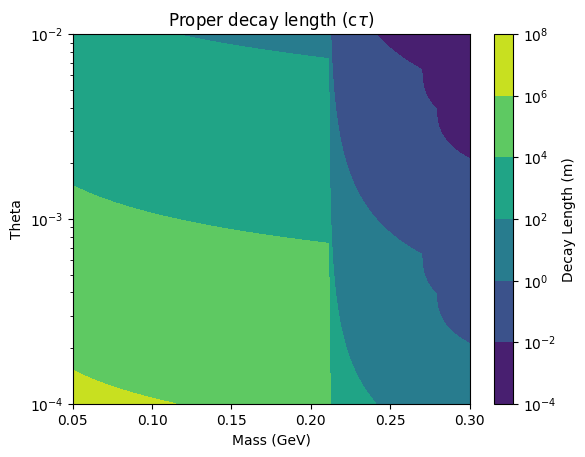

In [27]:
import matplotlib.colors
theta_points = np.logspace(-4,-2, 1000)
mass_points = np.linspace(0.05, 0.3,1000)
energy = 1 # GeV


# Create a meshgrid of mass and theta points
mass_grid, theta_grid = np.meshgrid(mass_points, theta_points)
# Calculate the decay length for each point in the grid
decay_length_grid = proper_decay_length(mass_grid, theta_grid)

# Plot the decay length as a contour plot
plt.figure()
plt.contourf(mass_grid, theta_grid, decay_length_grid, levels=100, cmap='viridis', norm=matplotlib.colors.LogNorm())
plt.colorbar(label='Decay Length (m)')
plt.yscale('log')
plt.xlabel('Mass (GeV)')
plt.ylabel('Theta')
title_string = r'Proper decay length (c$\tau$)'
plt.title(title_string)

# plt.title(rf'Decay Length Contours for $E_{'scalar'}$ = {energy} GeV')
